In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(11.7,8.27)})

    1 Деревья Решений

    1.1. Подключитесь к одному из датасетов Kaggle
Разберитесь в том, как устроен ваш датасет и какова постановка задачи. Сделайте необходимый препроцессинг данных

In [2]:
df = pd.read_csv('OnlineNewsPopularityReduced.csv', sep =',')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2014/09/28/jobs-tech-workers/,101,12,332,0.528481,1.0,0.645833,6,3,1,...,0.100000,0.7,-0.145833,-0.166667,-0.125000,0.718182,0.137121,0.218182,0.137121,8600
1,http://mashable.com/2014/09/28/obama-says-u-s-...,101,10,393,0.518817,1.0,0.596899,14,1,1,...,0.250000,0.8,-0.312500,-0.500000,-0.250000,0.500000,0.000000,0.000000,0.000000,23700
2,http://mashable.com/2014/09/28/once-upon-a-tim...,101,13,1643,0.388854,1.0,0.546967,29,4,7,...,0.033333,0.8,-0.227778,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,8400
3,http://mashable.com/2014/09/28/the-simpsons-de...,101,9,272,0.488889,1.0,0.512690,2,2,11,...,0.100000,1.0,-0.416667,-1.000000,-0.166667,0.000000,0.000000,0.500000,0.000000,4800
4,http://mashable.com/2014/09/28/viola-davis-les...,101,12,0,0.000000,0.0,0.000000,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.541071,0.067560,0.041071,0.067560,3100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            4954 non-null   object 
 1   timedelta                      4954 non-null   int64  
 2   n_tokens_title                 4954 non-null   int64  
 3   n_tokens_content               4954 non-null   int64  
 4   n_unique_tokens                4954 non-null   float64
 5   n_non_stop_words               4954 non-null   float64
 6   n_non_stop_unique_tokens       4954 non-null   float64
 7   num_hrefs                      4954 non-null   int64  
 8   num_self_hrefs                 4954 non-null   int64  
 9   num_imgs                       4954 non-null   int64  
 10  num_videos                     4954 non-null   int64  
 11  average_token_length           4954 non-null   float64
 12  num_keywords                   4954 non-null   i

In [4]:
df.describe(include = 'all')

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,4954,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,...,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
unique,4954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,http://mashable.com/2014/09/28/jobs-tech-workers/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.628381,11.201857,550.405733,0.478429,0.901494,0.616601,10.355874,2.677634,3.572467,...,0.086668,0.696986,-0.251748,-0.527945,-0.097392,0.295246,0.062419,0.338684,0.160434,3340.911183
std,NaN,22.589941,2.182106,457.900604,0.180073,0.298028,0.220690,12.529856,3.402775,5.979075,...,0.069650,0.305969,0.140502,0.317784,0.095186,0.328431,0.272434,0.187267,0.228852,9182.718830
min,NaN,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,5.000000
25%,NaN,30.000000,10.000000,256.000000,0.445631,1.000000,0.608315,3.000000,1.000000,1.000000,...,0.050000,0.500000,-0.331006,-0.800000,-0.125000,0.000000,0.000000,0.166667,0.000000,945.250000
50%,NaN,50.000000,11.000000,436.000000,0.515556,1.000000,0.671141,7.000000,2.000000,1.000000,...,0.100000,0.800000,-0.251427,-0.500000,-0.100000,0.200000,0.000000,0.500000,0.037500,1400.000000
75%,NaN,68.000000,13.000000,753.750000,0.579986,1.000000,0.731024,13.000000,3.000000,3.000000,...,0.100000,1.000000,-0.178616,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000


In [5]:
df.corrwith(df["shares"])

timedelta                        0.076906
n_tokens_title                   0.028713
n_tokens_content                -0.069169
n_unique_tokens                 -0.076965
n_non_stop_words                -0.110147
n_non_stop_unique_tokens        -0.095301
num_hrefs                       -0.011228
num_self_hrefs                  -0.025997
num_imgs                         0.017732
num_videos                      -0.013238
average_token_length            -0.114058
num_keywords                     0.041860
data_channel_is_lifestyle       -0.014671
data_channel_is_entertainment   -0.019967
data_channel_is_bus             -0.029795
data_channel_is_socmed          -0.006927
data_channel_is_tech            -0.018027
data_channel_is_world           -0.065362
kw_min_min                            NaN
kw_max_min                       0.026138
kw_avg_min                       0.024942
kw_min_max                       0.020489
kw_max_max                      -0.000828
kw_avg_max                       0

In [6]:
df = df.drop(columns = ['url'])

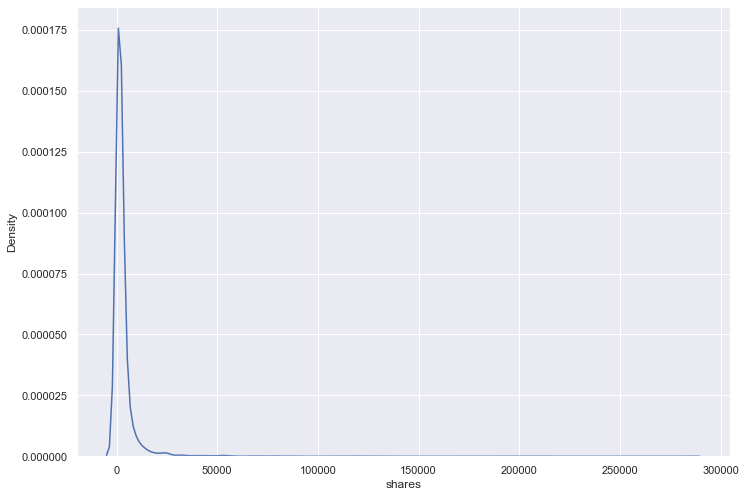

In [7]:
sns.kdeplot(df.shares);

In [8]:
from scipy.stats import normaltest

df['shares_log'] = np.log(df.shares)
stat, p = normaltest(df.shares_log)
df = df.drop(columns = ['shares'])
print(stat)
print(p)

972.9481369867426
5.333305534977436e-212


    1.2. Разбейте набор данных на обучающую и валидационную выборки с помощью функции train_test_split.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop(columns = ['shares_log'])
y = df['shares_log']

X_1 = scaler.fit_transform(X)
X_1

array([[ 2.2743222 ,  0.36580414, -0.47702007, ...,  0.27422906,
        -0.64354223, -0.10187929],
       [ 2.2743222 , -0.55083405, -0.34378994, ..., -0.2291399 ,
        -1.80874145, -0.70110989],
       [ 2.2743222 ,  0.82412323,  2.3863357 , ..., -0.2291399 ,
         0.86150677, -0.70110989],
       ...,
       [-1.84296997, -0.55083405, -0.23676902, ...,  0.27144801,
        -1.56599161, -0.10518996],
       [-1.84296997, -2.38411043,  0.28741511, ..., -0.2291399 ,
         0.86150677, -0.70110989],
       [-1.84296997, -0.55083405, -0.85923766, ...,  0.68860462,
        -0.91865871,  0.39140998]])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.25, random_state=42)

    1.3. Обучите алгоритм классификации DecisionTreeClassifier или регрессии DecisionTreeRegressor.

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

1.196816505240317

In [12]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

-0.8195173979587107

    2. НАСТРОЙКА ГИПЕРПАРАМЕТРОВ ДЕРЕВА

    2.1. Создайте генератор разбиений, который перемешивает выборку перед созданием блоков (shuffle=True). Число блоков n_splits равно 5. Задайте также парамет рrandom_state для воспроизводимости результатов.
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42) # n_splits играет роль K
tree = DecisionTreeRegressor()

In [14]:
scores = cross_val_score(tree, X_1, y, cv=kf, scoring='explained_variance')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-0.88222006 -0.76728844 -0.44791323 -0.79901836 -0.53600762]
Средняя метрика на кросс-валидации: -0.6864895435697027


In [15]:
scores = cross_val_score(tree, X_1, y, cv=kf, scoring='r2')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-0.84651815 -0.72483694 -0.38546899 -0.71235633 -0.61674695]
Средняя метрика на кросс-валидации: -0.6571854701909083


In [16]:
scores = cross_val_score(tree, X_1, y, cv=kf, scoring='neg_mean_squared_error')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-1.43147447 -1.36130689 -1.37126059 -1.49756565 -1.35779096]
Средняя метрика на кросс-валидации: -1.4038797121125377


In [17]:
scores = cross_val_score(tree, X_1, y, cv=kf, scoring='neg_mean_absolute_error')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-0.89558918 -0.83736551 -0.84771878 -0.83331649 -0.84138596]
Средняя метрика на кросс-валидации: -0.8510751835142146


Везде ситуация неутешительна, поэтому поменяем гиперпараметры и посмотрим как поменяются результата

In [18]:
tree = DecisionTreeRegressor(max_depth = 5, max_features = 3)
scores = cross_val_score(tree, X_1, y, cv=kf, scoring='explained_variance')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [0.08374163 0.12702008 0.08193638 0.09923104 0.09039655]
Средняя метрика на кросс-валидации: 0.0964651334373154


In [19]:
scores = cross_val_score(tree, X_1, y, cv=kf, scoring='r2')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [0.02748622 0.03097307 0.08766221 0.12708986 0.12675332]
Средняя метрика на кросс-валидации: 0.07999293683752258


In [20]:
scores = cross_val_score(tree, X_1, y, cv=kf, scoring='neg_mean_squared_error')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-0.76099825 -0.71632063 -0.87236636 -0.7378842  -0.83242112]
Средняя метрика на кросс-валидации: -0.7839981115322572


In [21]:
scores = cross_val_score(tree, X_1, y, cv=kf, scoring='neg_mean_absolute_error')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-0.64398914 -0.6316499  -0.72243912 -0.66549012 -0.6675962 ]
Средняя метрика на кросс-валидации: -0.666232895442743


Ситуация стала лучше. Как видим, можем использовать метрики r2 и explained_variance для данных гиперпараметров.

Гиперпараметры улучшили ситуацию в нашей задаче, посмотрим, какие гиперпараметры будут лучшими для дерева решений.

    2.2. Осуществите кросс-валидацию модели для подбора гиперпараметров:
    - максимальная глубина дерева max_depth;
    - минимальное число объектов для разбиения вомвнутренней вершине min_samples_split;
    - минимальное число объектов в листе min_samples_leaf;
    - максимальное количество признаков, рассматриваемых при поиске лучшего разбиения max_features

In [22]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor()
# tree_params={'max_depth': np.arange(2, 11), 'min_samples_split': np.arange(2,21), 'min_samples_leaf': np.arange(2,11), 'max_features': np.arange(2,16)} # словарь параметров (ключ: набор возможных значений)
tree_params_1={'max_depth': np.arange(2, 21)}

tree_grid_1 = GridSearchCV(tree, tree_params_1, cv=kf, scoring='explained_variance', n_jobs = -1)
tree_grid_1.fit(X_train, y_train)
print("Найлучшее качество модели при", tree_grid_1.best_params_)
print("Наилучшая оценка качества модели:", tree_grid_1.best_score_)

Найлучшее качество модели при {'max_depth': 4}
Наилучшая оценка качества модели: 0.16278772806420952


In [23]:
tree = DecisionTreeRegressor(max_depth = 4)
tree_params_2={'min_samples_split': np.arange(2, 21)}

tree_grid_2 = GridSearchCV(tree, tree_params_2, cv=kf, scoring='explained_variance', n_jobs = -1)
tree_grid_2.fit(X_train, y_train)
print("Найлучшее качество модели при", tree_grid_2.best_params_)
print("Наилучшая оценка качества модели:", tree_grid_2.best_score_)

Найлучшее качество модели при {'min_samples_split': 6}
Наилучшая оценка качества модели: 0.16319940237544395


In [24]:
tree = DecisionTreeRegressor(max_depth = 4, min_samples_split = 5)
tree_params_3={'min_samples_leaf': np.arange(2, 21)}

tree_grid_3 = GridSearchCV(tree, tree_params_3, cv=kf, scoring='explained_variance', n_jobs = -1)
tree_grid_3.fit(X_train, y_train)
print("Найлучшее качество модели при", tree_grid_3.best_params_)
print("Наилучшая оценка качества модели:", tree_grid_3.best_score_)

Найлучшее качество модели при {'min_samples_leaf': 20}
Наилучшая оценка качества модели: 0.17319072975444783


In [25]:
tree = DecisionTreeRegressor(max_depth = 4, min_samples_split = 5, min_samples_leaf = 20)
tree_params_4={'max_features': np.arange(2, 21)}

tree_grid_4 = GridSearchCV(tree, tree_params_4, cv=kf, scoring='explained_variance', n_jobs = -1)
tree_grid_4.fit(X_train, y_train)
print("Найлучшее качество модели при", tree_grid_4.best_params_)
print("Наилучшая оценка качества модели:", tree_grid_4.best_score_)

Найлучшее качество модели при {'max_features': 17}
Наилучшая оценка качества модели: 0.14851731875385402


    2.3. Постройте валидационные кривые. Сделайте выводы.

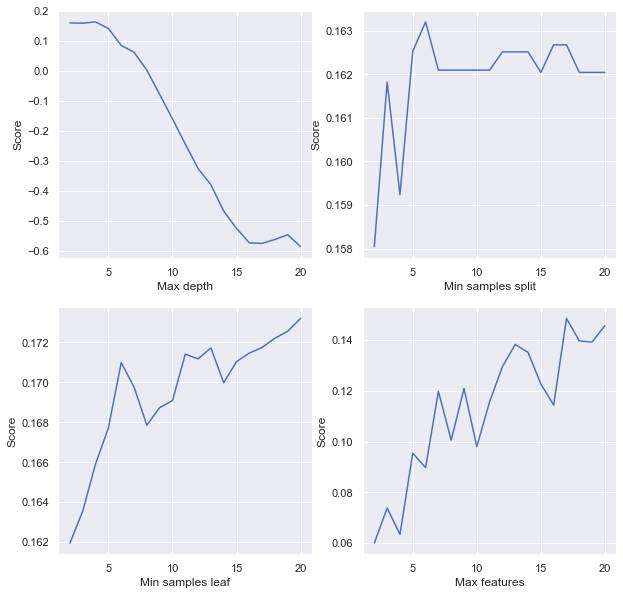

In [26]:
fig, ax = plt.subplots(2, 2, figsize = (10,10))

ax[0,0].set_xlabel("Max depth")
ax[0,0].set_ylabel("Score")
ax[0,0].plot(tree_params_1['max_depth'], tree_grid_1.cv_results_["mean_test_score"]);

ax[0,1].set_xlabel("Min samples split")
ax[0,1].set_ylabel("Score")
ax[0,1].plot(tree_params_2["min_samples_split"], tree_grid_2.cv_results_["mean_test_score"]);

ax[1,0].set_xlabel("Min samples leaf")
ax[1,0].set_ylabel("Score")
ax[1,0].plot(tree_params_3["min_samples_leaf"],tree_grid_3.cv_results_["mean_test_score"]);

ax[1,1].set_xlabel("Max features")
ax[1,1].set_ylabel("Score")
ax[1,1].plot(tree_params_4["max_features"], tree_grid_4.cv_results_["mean_test_score"]);


    2.4 Постройте графически полученное дерево. Оцените важность признаков.

In [27]:
from sklearn.tree import export_graphviz
tree = DecisionTreeRegressor(max_depth = 4, min_samples_split = 5, min_samples_leaf = 20, max_features = 19)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file='tree.dot', feature_names=X.columns)
print(open('tree.dot').read()) 

digraph Tree {
node [shape=box] ;
0 [label="self_reference_max_shares <= -0.097\nmse = 0.872\nsamples = 3715\nvalue = 7.465"] ;
1 [label="kw_avg_avg <= 0.097\nmse = 0.829\nsamples = 2599\nvalue = 7.372"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="kw_max_avg <= -0.453\nmse = 0.585\nsamples = 1752\nvalue = 7.184"] ;
1 -> 2 ;
3 [label="data_channel_is_tech <= 1.1\nmse = 0.511\nsamples = 606\nvalue = 7.007"] ;
2 -> 3 ;
4 [label="mse = 0.509\nsamples = 536\nvalue = 6.963"] ;
3 -> 4 ;
5 [label="mse = 0.401\nsamples = 70\nvalue = 7.339"] ;
3 -> 5 ;
6 [label="is_weekend <= 1.079\nmse = 0.598\nsamples = 1146\nvalue = 7.278"] ;
2 -> 6 ;
7 [label="mse = 0.568\nsamples = 998\nvalue = 7.236"] ;
6 -> 7 ;
8 [label="mse = 0.709\nsamples = 148\nvalue = 7.563"] ;
6 -> 8 ;
9 [label="kw_avg_avg <= 1.241\nmse = 1.111\nsamples = 847\nvalue = 7.759"] ;
1 -> 9 ;
10 [label="num_keywords <= -0.81\nmse = 0.926\nsamples = 571\nvalue = 7.636"] ;
9 -> 10 ;
11 [label="mse = 0.892\nsamp

In [28]:
features = {'f' + str(i + 1):name for (i, name) in zip(range(len(df.columns)), df.columns)}
importances = tree.feature_importances_

indices = np.argsort(importances)[:: -1]
num_to_plot = 10
feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

print("Feature ranking:")
for f in range(num_to_plot):
    print(f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])

Feature ranking:
1 kw_avg_avg 0.42115467438579385
2 self_reference_max_shares 0.14647189204989888
3 timedelta 0.12993941371670195
4 LDA_02 0.08398944370164955
5 kw_max_avg 0.05741088262734577
6 self_reference_min_shares 0.05024440039768547
7 num_imgs 0.03281983459971971
8 is_weekend 0.026914717401974174
9 num_keywords 0.02443368692204558
10 data_channel_is_tech 0.01713393194450026


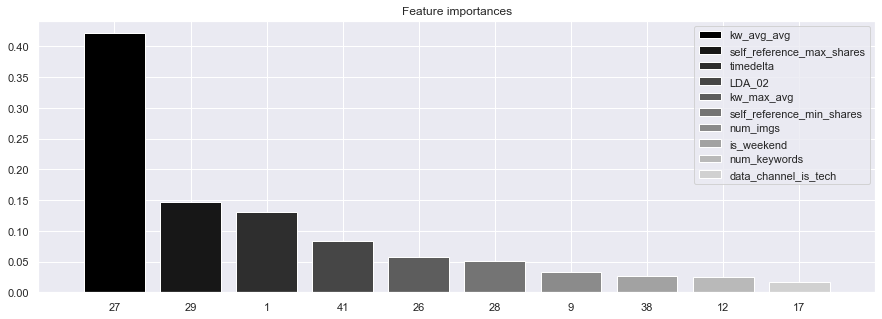

In [29]:
plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i / float(num_to_plot +  1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f" + str(i)]) for i in feature_indices]);

    3. Случайный лес

    3.1. Постройте модель случайного леса для вашей задачи с гиперпараметрами по умолчанию и оцените качество модели.

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [31]:
explained_variance_score(y_test, y_pred)

0.20497332487847875

    3.2 Осуществите подбор гиперпараметров модели.
    • Количество деревьев n_estimators;
    • Максимальная глубина дерева max_depth;
    • Минимальное число объектов для разбиения во внутренней вершине min_samples_split;
    • Минимальное число объектов в листе min_samples_leaf;
    • Максимальное количество признаков, рассматриваемых при поиске лучшего разбиения max_features.

In [34]:
rf = RandomForestRegressor()
rf_params_estimators_1 = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500]}
rf_grid_estimators_1 = GridSearchCV(rf, rf_params_estimators_1, cv=kf, scoring='explained_variance', n_jobs = -1)
rf_grid_estimators_1.fit(X_train, y_train)
print("Найлучшее качество модели при", rf_grid_estimators_1.best_params_)
print("Наилучшая оценка качества модели:", rf_grid_estimators_1.best_score_)

Найлучшее качество модели при {'n_estimators': 350}
Наилучшая оценка качества модели: 0.22908116280766827


In [38]:
rf = RandomForestRegressor(n_estimators = 350)
rf_params_estimators_2 = {'max_depth': np.arange(2, 11)}
rf_grid_estimators_2 = GridSearchCV(rf, rf_params_estimators_2, cv=kf, scoring='explained_variance', n_jobs = -1)
rf_grid_estimators_2.fit(X_train, y_train)
print("Найлучшее качество модели при", rf_grid_estimators_2.best_params_)
print("Наилучшая оценка качества модели:", rf_grid_estimators_2.best_score_)

Найлучшее качество модели при {'max_depth': 10}
Наилучшая оценка качества модели: 0.22675857918715892


In [40]:
rf = RandomForestRegressor(n_estimators = 350, max_depth = 10)
rf_params_estimators_3 = {'min_samples_split': np.arange(20, 31)}
rf_grid_estimators_3 = GridSearchCV(rf, rf_params_estimators_3, cv=kf, scoring='explained_variance', n_jobs = -1)
rf_grid_estimators_3.fit(X_train, y_train)
print("Найлучшее качество модели при", rf_grid_estimators_3.best_params_)
print("Наилучшая оценка качества модели:", rf_grid_estimators_3.best_score_)

Найлучшее качество модели при {'min_samples_split': 26}
Наилучшая оценка качества модели: 0.23128024990520882


In [41]:
rf = RandomForestRegressor(n_estimators = 350, max_depth = 10, min_samples_split = 26)
rf_params_estimators_4 = {'min_samples_leaf': np.arange(18, 31)}
rf_grid_estimators_4 = GridSearchCV(rf, rf_params_estimators_4, cv=kf, scoring='explained_variance', n_jobs = -1)
rf_grid_estimators_4.fit(X_train, y_train)
print("Найлучшее качество модели при", rf_grid_estimators_4.best_params_)
print("Наилучшая оценка качества модели:", rf_grid_estimators_4.best_score_)

Найлучшее качество модели при {'min_samples_leaf': 19}
Наилучшая оценка качества модели: 0.23374624323669657


In [43]:
rf = RandomForestRegressor(n_estimators = 350, max_depth = 10, min_samples_split = 19)
rf_params_estimators_5 = {'max_features': np.arange(18, 31)}
rf_grid_estimators_5 = GridSearchCV(rf, rf_params_estimators_5, cv=kf, scoring='explained_variance', n_jobs = -1)
rf_grid_estimators_5.fit(X_train, y_train)
print("Найлучшее качество модели при", rf_grid_estimators_5.best_params_)
print("Наилучшая оценка качества модели:", rf_grid_estimators_5.best_score_)

Найлучшее качество модели при {'max_features': 21}
Наилучшая оценка качества модели: 0.23483440057609367


    3.3. Постройте валидационные кривые для каждого из гиперпараметров.

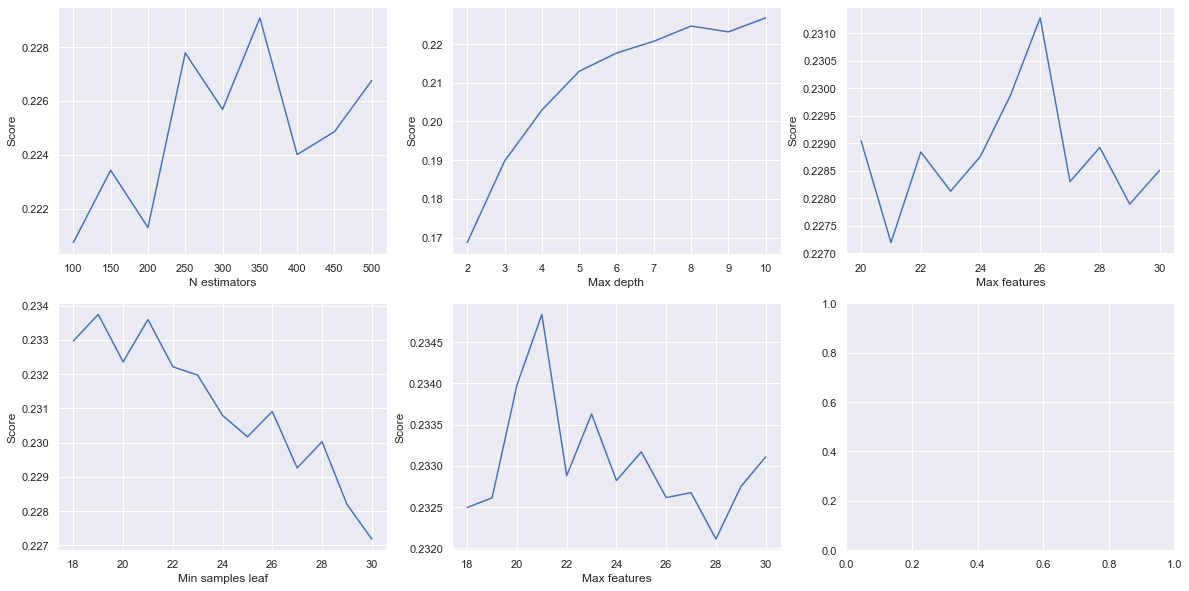

In [47]:
fig, ax = plt.subplots(2, 3, figsize = (20,10))

ax[0,0].set_xlabel("N estimators")
ax[0,0].set_ylabel("Score")
ax[0,0].plot(rf_params_estimators_1['n_estimators'], rf_grid_estimators_1.cv_results_["mean_test_score"]);

ax[0,1].set_xlabel("Max depth")
ax[0,1].set_ylabel("Score")
ax[0,1].plot(rf_params_estimators_2["max_depth"], rf_grid_estimators_2.cv_results_["mean_test_score"]);

ax[0,2].set_xlabel("Max features")
ax[0,2].set_ylabel("Score")
ax[0,2].plot(rf_params_estimators_3["min_samples_split"], rf_grid_estimators_3.cv_results_["mean_test_score"]);

ax[1,0].set_xlabel("Min samples leaf")
ax[1,0].set_ylabel("Score")
ax[1,0].plot(rf_params_estimators_4["min_samples_leaf"], rf_grid_estimators_4.cv_results_["mean_test_score"]);

ax[1,1].set_xlabel("Max features")
ax[1,1].set_ylabel("Score")
ax[1,1].plot(rf_params_estimators_5["max_features"], rf_grid_estimators_5.cv_results_["mean_test_score"]);

    3.4. Оцените важность признаков данной модели. Визуализируйте топ-10 самых полезных признаков.

In [35]:
features = {'f' + str(i + 1):name for (i, name) in zip(range(len(df.columns)), df.columns)}
importances = tree.feature_importances_

indices = np.argsort(importances)[:: -1]
num_to_plot = 10
feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

print("Feature ranking:")
for f in range(num_to_plot):
    print(f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])

Feature ranking:
1 kw_avg_avg 0.42115467438579385
2 self_reference_max_shares 0.14647189204989888
3 timedelta 0.12993941371670195
4 LDA_02 0.08398944370164955
5 kw_max_avg 0.05741088262734577
6 self_reference_min_shares 0.05024440039768547
7 num_imgs 0.03281983459971971
8 is_weekend 0.026914717401974174
9 num_keywords 0.02443368692204558
10 data_channel_is_tech 0.01713393194450026


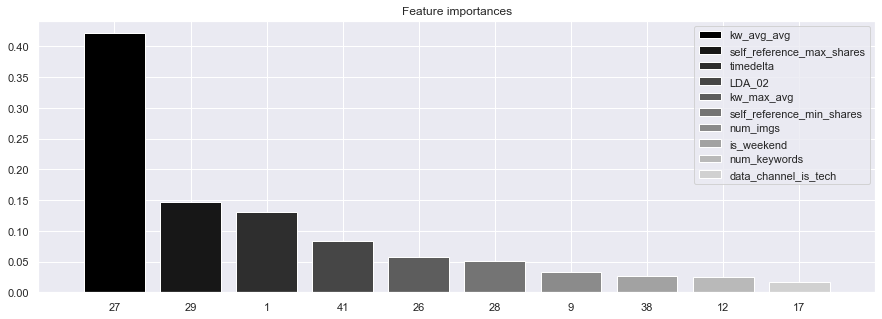

In [36]:
plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i / float(num_to_plot +  1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f" + str(i)]) for i in feature_indices]);

    3.5 Сравните результаты метода ближайших соседей, дерева решений и случайного леса. Сформулируйте выводы.

Качество модели метода ближайших соседей оказался найхудшим из всех. Деревья решений намного быстрее чем метод ближайших соседей и качесто модели напорядок выше. Самым долгим окозался рамдомный лес, но при этом качество модели найлучшее.